<a href="https://colab.research.google.com/github/amrtariq/NTI_AI_Projects/blob/main/Cifar10_CNN_Test_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cifar10_CNN_Test_V2
For better Accuracy

##Data Loading and Preparation

In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

##Model Fitting

In [ ]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
#model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=20,batch_size=128,shuffle='true',validation_data=(x_test, y_test))



Epoch 1/20
391/391 [==============================] - 62s 154ms/step - loss: 1.7482 - accuracy: 0.3534 - val_loss: 1.5219 - val_accuracy: 0.4473
Epoch 2/20
391/391 [==============================] - 59s 150ms/step - loss: 1.4327 - accuracy: 0.4796 - val_loss: 1.3499 - val_accuracy: 0.5134
Epoch 3/20
391/391 [==============================] - 57s 145ms/step - loss: 1.2975 - accuracy: 0.5344 - val_loss: 1.2417 - val_accuracy: 0.5614
Epoch 4/20
391/391 [==============================] - 57s 145ms/step - loss: 1.1931 - accuracy: 0.5777 - val_loss: 1.1436 - val_accuracy: 0.6007
Epoch 5/20
391/391 [==============================] - 57s 145ms/step - loss: 1.1215 - accuracy: 0.6040 - val_loss: 1.0908 - val_accuracy: 0.6148
Epoch 6/20
391/391 [==============================] - 56s 144ms/step - loss: 1.0538 - accuracy: 0.6299 - val_loss: 1.0507 - val_accuracy: 0.6280
Epoch 7/20
391/391 [==============================] - 56s 144ms/step - loss: 1.0053 - accuracy: 0.6484 - val_loss: 1.0289 - val_ac

##Results

In [ ]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 4s 12ms/step - loss: 0.8957 - accuracy: 0.7022


313/313 [==============================] - 4s 12ms/step - loss: 0.8957 - accuracy: 0.7022


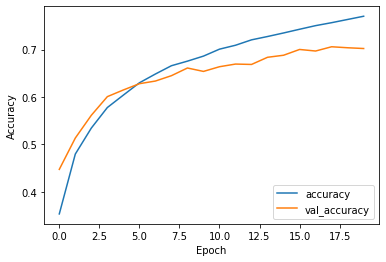

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)

Text(0, 0.5, 'Training and Validation losses')

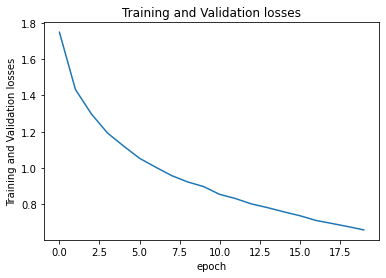

In [ ]:
plt.plot(results.history['loss'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('Training and Validation losses')